<a href="https://colab.research.google.com/github/viviantram03/labb-1/blob/main/AI_final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error

In [ ]:
# data acquisition
# load the dataset
df = pd.read_csv('Air_Pollution_data.csv')

In [ ]:
# select features (pollutants) and target (PM2.5)
# use other pollutants to infer PM2.5 levels
features = ['co', 'no', 'no2', 'o3', 'so2', 'pm10', 'nh3', 'co2']
target = 'pm2_5';

# drop rows with missing values to ensure clean training data
data = df[features + [target]].dropna()

# split data into training (70%) and testing (30%) sets
X = data[features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)


In [ ]:
# model A: linear regression (baseline)
print("Training Linear Regression...")
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# model B: random forest regressor (advanced)
print("Training Random Forest...")
rf = RandomForestRegressor(n_estimators=50, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

Training Linear Regression...
Training Random Forest...


In [ ]:
# evaluation
r2_lr = r2_score(y_test, y_pred_lr)
r2_rf = r2_score(y_test, y_pred_rf)

print("\n" + "="*40)
print("Final Results (R^2 Score)")
print("="*40)
print(f"Linear Regression: {r2_lr:.4f}")
print(f"Random Forest: {r2_rf:.4f}")
print("="*40)


Final Results (R^2 Score)
Linear Regression: 0.9823
Random Forest: 0.9939


/tmp/ipython-input-3373503427.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rf.feature_importances_, y=features, palette='magma')


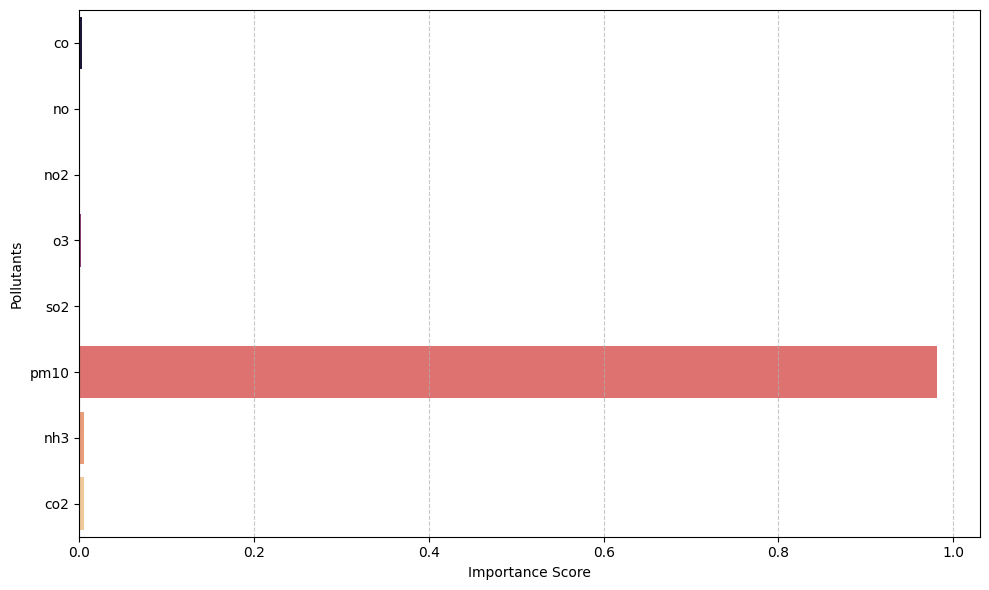

In [ ]:
# visualization (analysis)

# plotting feature importance to see which pollutants drive PM2.5 levels
plt.figure(figsize=(10,6))
sns.barplot(x=rf.feature_importances_, y=features, palette='magma')
plt.xlabel('Feature Importance: Predictors of PM2.5')
plt.xlabel('Importance Score')
plt.ylabel('Pollutants')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
